In [1]:

import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import pandas as pd

from tqdm import tqdm


In [2]:
csv_file = 'D:/Advanced AI/Project/trainLabels.csv'
image_file_path = 'D:/Advanced AI/Project/resized_train/resized_train/'

In [3]:
metadata = pd.read_csv(csv_file)

In [4]:
metadata.head(10)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


<Axes: ylabel='count'>

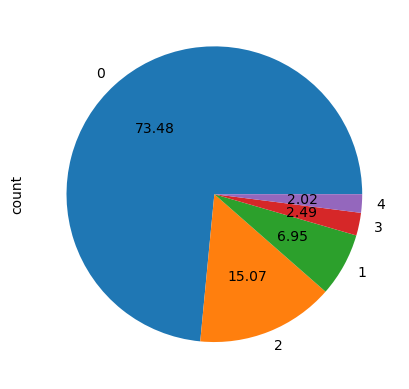

In [5]:
metadata['level'].value_counts().plot.pie(autopct='%.2f')

In [6]:
# load the model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summary
print(model.summary())



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
def extract_features(image_path):
    
        img = load_img(image_path, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        feature = model.predict(img, verbose=0)
        
        return feature





In [8]:
# Initialize a list to store extracted features
extracted_features = []

# Iterate through the rows and extract features based on timestamps
for index, row in tqdm(metadata.head(400).iterrows()):
    
    final_class_labels = row['level']
    image_file_name = str(row['image']) + '.jpeg'
    file_name = os.path.join(os.path.abspath(image_file_path), image_file_name)

    final_class_labels=row['level']
    data=extract_features(file_name)
    extracted_features.append([data,final_class_labels])


400it [02:24,  2.77it/s]


In [9]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[[0.0, 1.3347487, 0.059725642, 0.04688278, 0.0...",0
1,"[[0.0, 2.0819688, 2.5630593, 0.26540542, 0.0, ...",0
2,"[[0.0, 1.3307015, 0.44092822, 1.3146857, 0.0, ...",0
3,"[[0.0, 0.6439965, 1.3150665, 0.67429626, 0.0, ...",0
4,"[[0.0, 2.2962701, 1.6575863, 1.0452238, 0.0, 0...",1


In [10]:
extracted_features_df['class'].value_counts()

class
0    296
2     57
1     24
4     15
3      8
Name: count, dtype: int64

In [11]:
import numpy as np
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [12]:
X.shape

(400, 1, 4096)

In [13]:
y

array([0, 0, 0, 0, 1, 2, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 4, 4, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 3,

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Flatten the image features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [17]:
# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_flattened, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = clf.predict(X_test_flattened)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)

Decision Tree Classifier Accuracy: 0.6125


In [20]:
from sklearn.metrics import precision_score


In [21]:
micro_precision = precision_score(y_pred, y_test, average='weighted')


macro_precision = precision_score(y_pred, y_test, average='weighted')

per_class_precision = precision_score(y_pred, y_test, average='weighted')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
per_class_precision

0.6029166666666667

In [23]:
micro_precision

0.6029166666666667

In [24]:
macro_precision

0.6029166666666667